In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
base_dir = 'results/Specialist_final_2'
methods_list = ['EvomanAnnNeatStatic','EvomanAnnNeatDynamic']
n_runs = 10
enemies = [1,2,3,6,7]
plots_dir = base_dir + '/plots'

## Train

In [40]:
# Read the single dataframes and merge them.
def create_merged_training_df():
    df = pd.DataFrame()
    for name in methods_list:
        for run in range(n_runs):
            for enemy in enemies:
                df_tmp = pd.read_csv(
                    base_dir + '/' + name + '_run_' + str(run) + '/enemy' + str(enemy) + '/results_training.csv',
                    delimiter=';', 
                    header = 0,
                    index_col=0
                )

                df = pd.concat([df, df_tmp])

    # Reset index after concatenation
    df = df.reset_index(drop=True)
    return df

In [50]:
def plot_feature_by_gen_with_std(df, feature, style=None):
    for enemy in enemies:
        plt.figure(figsize=(15, 5))
        sns.lineplot(data=df[df['enemy'] == enemy],
                     x="gen",
                     y=feature,
                     hue="method",
                     style=style,
                     ci='sd')

        plt.title('Training statistics for enemy: ' + str(enemy))
        plt.xlabel('Generation')
        plt.ylabel(feature)
        plt.legend(fontsize='x-large', title_fontsize='40')
        plt.savefig(plots_dir + '/' + feature + '_' + str(enemy))

In [42]:
def plot_max_avg_by_gen(df):
    # Max an avg plots
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)

    # Creation of the max avg df
    df_mean = df.groupby(['method', 'enemy', 'run', 'gen']).mean().reset_index().loc[:,['method', 'enemy' ,'run', 'gen', 'fitness']]
    df_mean['stat'] = 'mean'
    df_max = df.groupby(['method', 'enemy', 'run' ,'gen']).max().reset_index().loc[:,['method', 'enemy' ,'run', 'gen', 'fitness']]
    df_max['stat'] = 'max'

    df_mean_max = pd.concat([df_mean, df_max]).reset_index(drop=True)
    plot_feature_by_gen_with_std(df=df_mean_max, feature='fitness', style='stat')

In [43]:
def plot_win_ratio(df):
    df_ratio = df
    df_ratio['win_ratio'] = 0
    df_ratio.loc[df_ratio['enemy_life'] == 0, 'win_ratio'] = 1
    df_ratio = df_ratio.groupby(['method', 'enemy', 'run', 'gen'])['win_ratio'].sum().reset_index()
    df_ratio.loc[:, 'win_ratio'] =  df_ratio.loc[:, 'win_ratio'] / df.groupby(['method', 'enemy', 'run', 'gen']).size().to_frame('size').reset_index()['size']
    df_ratio
    plot_feature_by_gen_with_std(df=df_ratio, feature='win_ratio')

In [44]:
df = create_merged_training_df()

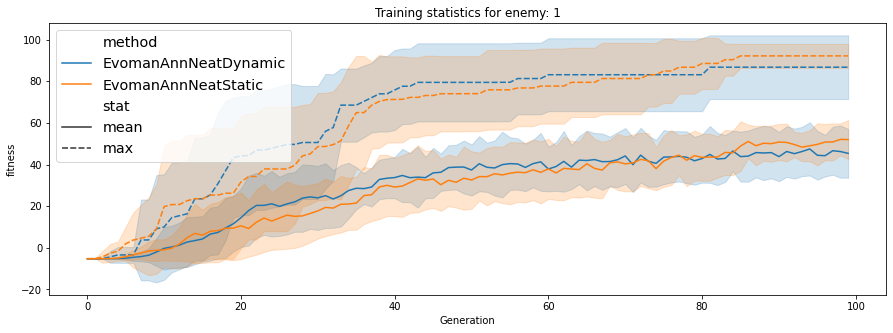

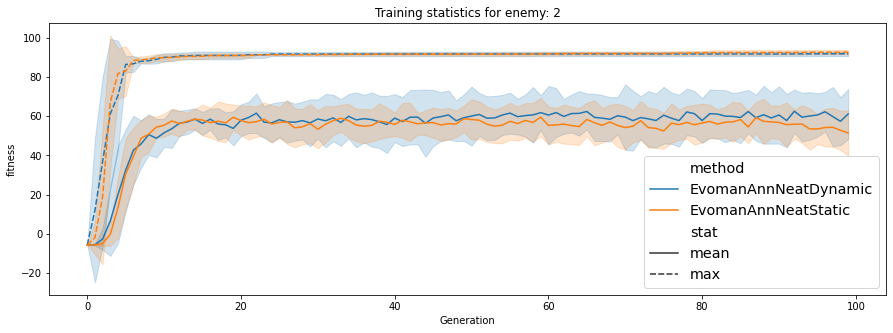

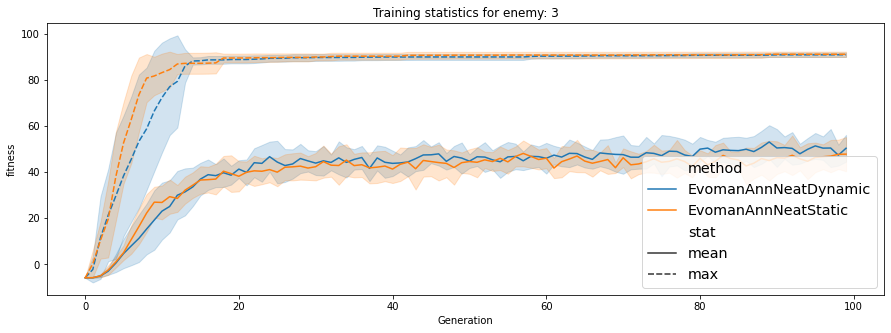

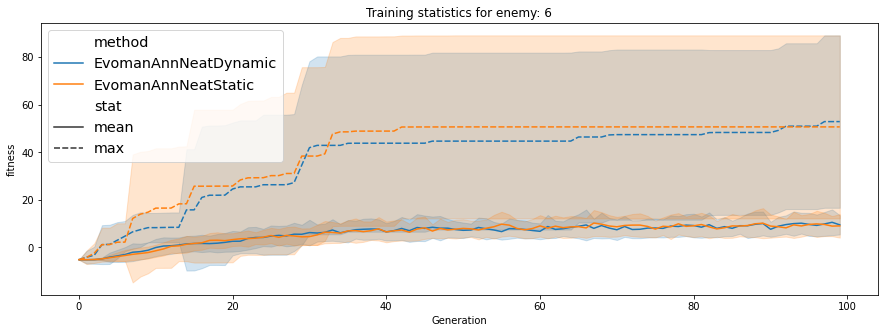

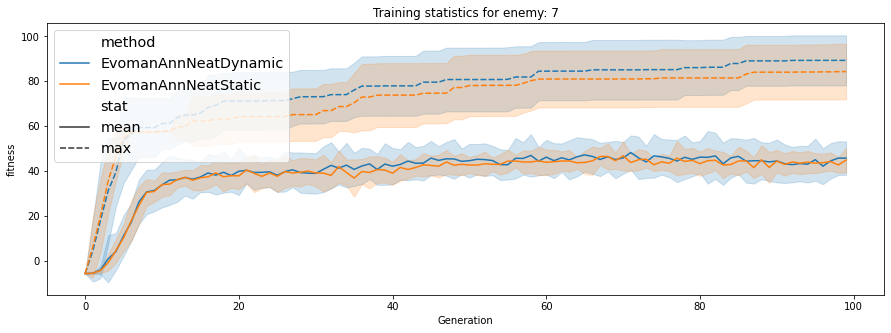

In [51]:
plot_max_avg_by_gen(df)
#plot_win_ratio(df)
#plot_feature_by_gen_with_std(df=df[df['method'] == 'EvomanAnnNeatDynamic']  , feature='player_life_importance')
#plot_feature_by_gen_with_std(df=df, feature='custom_fitness', style='method', style='stat')

## Test

In [81]:
df_test = pd.read_csv(
        base_dir + '/results_test.csv',
        header = 0,
        index_col=0,
        sep=';'
    )

df_test_randomini = pd.read_csv(
        base_dir + '/results_test_randomini.csv',
        header = 0,
        index_col=0,
        sep=';'
    )

In [27]:
# override gain removing 100 for assignment restrictions
#df_test['gain'] = df_test['gain'] - 100
#df_test_randomini['gain'] = df_test_randomini['gain'] - 100
#df_test.to_csv(base_dir + '/results_test.csv', sep=';')
#df_test_randomini.to_csv(base_dir + '/results_test_randomini.csv', sep=';')

In [84]:
def plot_boxes_test(df, plots_dir):
    enemy_to_consider = [1,2,3,6,7]
    df_test_grouped = df[df['enemy'].isin(enemy_to_consider)].groupby(['method', 'run', 'enemy']).mean().reset_index()
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(x="enemy", y="gain", hue="method", data=df_test_grouped)
    ax = sns.swarmplot(x="enemy", y="gain", hue="method", data=df_test_grouped, color='0.25',dodge=True)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(fontsize='x-large', title_fontsize='40')
    ax.legend(handles[:2], labels[:2])
    
    plt.title('Gain for test dataset', fontsize=22)
    plt.xlabel('Enemy', fontsize=18)
    plt.ylabel('Gain value', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(plots_dir + '/box_plot_' + ('_'.join(map(str,enemy_to_consider))))

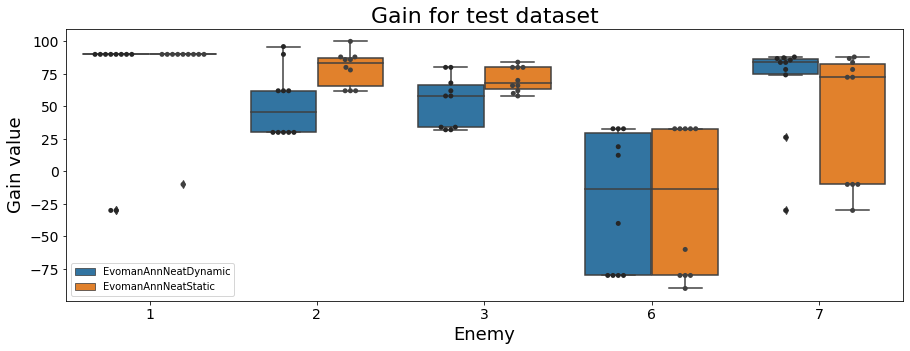

In [85]:
plot_boxes_test(df_test, plots_dir)
#plot_boxes_test(df_test_randomini, plots_dir)

In [19]:
# For a table showingt the player life

#df_test.groupby(['method', 'enemy']).max()['player_life'].reset_index()
#df_test_randomini.groupby(['method', 'enemy']).max()['player_life'].reset_index()

,method,enemy,player_life
0,EvomanAnnNeatDynamic,1,90.0
1,EvomanAnnNeatDynamic,2,76.0
2,EvomanAnnNeatDynamic,3,64.0
3,EvomanAnnNeatDynamic,6,0.0
4,EvomanAnnNeatDynamic,7,88.6
5,EvomanAnnNeatStatic,1,90.0
6,EvomanAnnNeatStatic,2,100.0
7,EvomanAnnNeatStatic,3,82.0
8,EvomanAnnNeatStatic,6,0.0
9,EvomanAnnNeatStatic,7,88.6
